# Classification MLP Project Handwritten Digit Recognition

### Import Necessary Libraries

In [2]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

### Load and Preprocess the MNIST Dataset

In [3]:
## The MNIST dataset is built into Keras, so we can easily load it using the mnist.load_data() function.
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


### Preprocess the Data

+ Normalize the Pixel Values: Scale the pixel values to the range [0, 1] by dividing by 255 (the maximum pixel value).
+ One-Hot Encode the Labels: Convert the target labels to one-hot encoding format, which is required for multi-class classification.

In [5]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

### Build the MLP Model

In [6]:
# Initialize the model
model1 = Sequential()

# Flatten the input (28x28 pixels) to a 1D vector of 784 features
model1.add(Flatten(input_shape=(28, 28)))

# Add hidden layers
model1.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons
model1.add(Dense(64, activation='relu'))   # Second hidden layer with 64 neurons

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Faiz Salam\AnacondaNavigator\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the Model

In [8]:
# Train the model
history = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8582 - loss: 0.4733 - val_accuracy: 0.9585 - val_loss: 0.1358
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9621 - loss: 0.1231 - val_accuracy: 0.9643 - val_loss: 0.1143
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0782 - val_accuracy: 0.9639 - val_loss: 0.1174
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.9722 - val_loss: 0.0970
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9741 - val_loss: 0.0945
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9727 - val_loss: 0.0954
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9724 - val_loss: 0.1082
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0232 -

### Visualize the Training Process

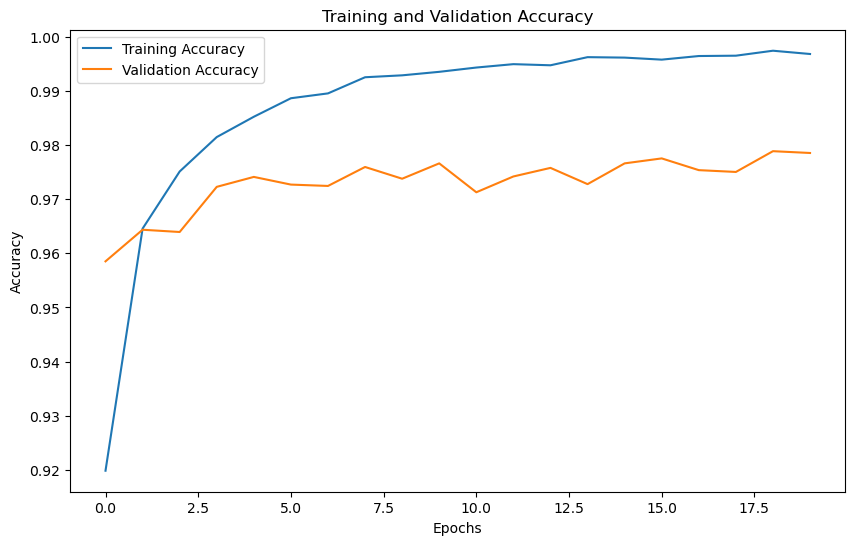

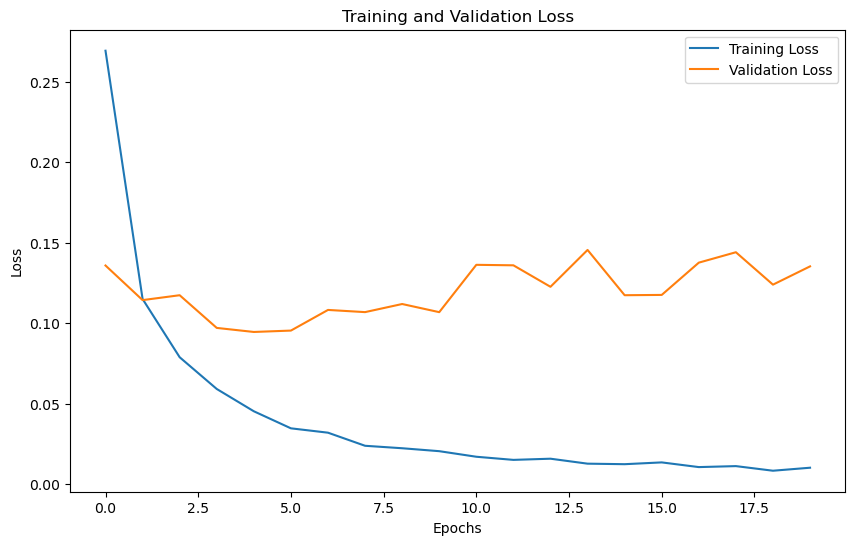

In [9]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Evaluate the Model

In [11]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9748 - loss: 0.1517
Test Accuracy: 0.98


### Make Predictions

In [13]:
# Make predictions on the test data
predictions = model1.predict(X_test)

# Display the first 5 predictions
for i in range(5):
    print(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
